# *IMPORTS*

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import shap
import lime
import lime.lime_tabular
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# *READING DATASETS*

In [295]:
airline_scrapped_rev = pd.read_csv('/kaggle/input/airlinedataset/AirlineScrappedReview_Cleaned.csv')
customer_comment = pd.read_csv('/kaggle/input/airlinedataset/Customer_comment.csv')
passenger_booking = pd.read_csv('/kaggle/input/airlinedataset/Passanger_booking_data.csv')
survey_data = pd.read_csv('/kaggle/input/airlinedataset/Survey data_Inflight Satisfaction Score.csv')

In [296]:
airline_scrapped_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passanger_Name   3574 non-null   object 
 1   Flying_Date      955 non-null    object 
 2   Route            2809 non-null   object 
 3   Rating           3575 non-null   int64  
 4   Verified         3575 non-null   object 
 5   Review_title     3575 non-null   object 
 6   Review_content   3575 non-null   object 
 7   Traveller_Type   3575 non-null   object 
 8   Class            3575 non-null   object 
 9   Start_Location   2809 non-null   object 
 10  End_Location     2809 non-null   object 
 11  Layover_Route    484 non-null    object 
 12  Start_Latitude   3515 non-null   float64
 13  Start_Longitude  3515 non-null   float64
 14  Start_Address    3515 non-null   object 
 15  End_Latitude     3476 non-null   float64
 16  End_Longitude    3476 non-null   float64
 17  End_Address   

In [297]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

In [298]:
passenger_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [299]:
customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                9424 non-null   int64 
 1   flight_number             9424 non-null   int64 
 2   origin_station_code       9424 non-null   object
 3   destination_station_code  9424 non-null   object
 4   scheduled_departure_date  9424 non-null   object
 5   arrival_delay_group       9424 non-null   object
 6   departure_delay_group     9424 non-null   object
 7   entity                    9424 non-null   object
 8   verbatim_text             9424 non-null   object
 9   seat_factor_band          9424 non-null   object
 10  ques_verbatim_text        9424 non-null   object
 11  loyalty_program_level     6920 non-null   object
 12  fleet_type_description    9424 non-null   object
 13  fleet_usage               9424 non-null   object
 14  response_group          

# *DATA CLEANING*

## *Cleaning AirlineScrappedReview_Cleaned.csv*
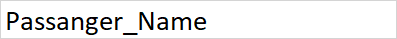
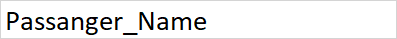
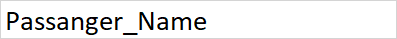
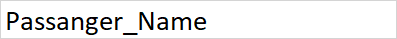
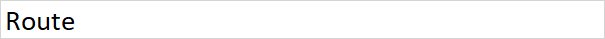
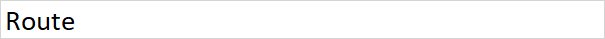
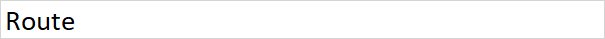
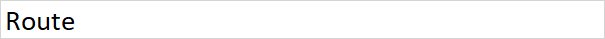

### Remove duplicates

In [300]:
airline_scrapped_rev = airline_scrapped_rev.drop_duplicates()

In [301]:
airline_scrapped_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3501 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passanger_Name   3500 non-null   object 
 1   Flying_Date      955 non-null    object 
 2   Route            2807 non-null   object 
 3   Rating           3501 non-null   int64  
 4   Verified         3501 non-null   object 
 5   Review_title     3501 non-null   object 
 6   Review_content   3501 non-null   object 
 7   Traveller_Type   3501 non-null   object 
 8   Class            3501 non-null   object 
 9   Start_Location   2807 non-null   object 
 10  End_Location     2807 non-null   object 
 11  Layover_Route    484 non-null    object 
 12  Start_Latitude   3441 non-null   float64
 13  Start_Longitude  3441 non-null   float64
 14  Start_Address    3441 non-null   object 
 15  End_Latitude     3402 non-null   float64
 16  End_Longitude    3402 non-null   float64
 17  End_Address      34

### Remove unnecessary columns:
1. Passanger_Name
2. Flying_Date
3. Start_Latitude
4. Start_Longitude
5. Start_Address
6. End_Latitude
7. End_Longitude
8. End_Address
9. Route

In [302]:
#Removing unnecessary columns
airline_scrapped_rev = airline_scrapped_rev.drop(columns=[
    'Passanger_Name',
    'Flying_Date',
    'Start_Latitude',
    'Start_Longitude',
    'Start_Address',
    'End_Latitude',
    'End_Longitude',
    'End_Address',
    'Route'
])

In [303]:
airline_scrapped_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3501 entries, 0 to 3574
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rating          3501 non-null   int64 
 1   Verified        3501 non-null   object
 2   Review_title    3501 non-null   object
 3   Review_content  3501 non-null   object
 4   Traveller_Type  3501 non-null   object
 5   Class           3501 non-null   object
 6   Start_Location  2807 non-null   object
 7   End_Location    2807 non-null   object
 8   Layover_Route   484 non-null    object
dtypes: int64(1), object(8)
memory usage: 273.5+ KB


### Modify in the following column:
1. Layover_Route (Fill with 'None')
2. Start_Location (Fill with 'Unknown')
3. End_Location (Fill with 'Unknown')

In [304]:
airline_scrapped_rev['Layover_Route'] = airline_scrapped_rev['Layover_Route'].fillna('None')
airline_scrapped_rev['Start_Location'] = airline_scrapped_rev['Start_Location'].fillna('Unknown')
airline_scrapped_rev['End_Location'] = airline_scrapped_rev['End_Location'].fillna('Unknown')

In [305]:
airline_scrapped_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3501 entries, 0 to 3574
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rating          3501 non-null   int64 
 1   Verified        3501 non-null   object
 2   Review_title    3501 non-null   object
 3   Review_content  3501 non-null   object
 4   Traveller_Type  3501 non-null   object
 5   Class           3501 non-null   object
 6   Start_Location  3501 non-null   object
 7   End_Location    3501 non-null   object
 8   Layover_Route   3501 non-null   object
dtypes: int64(1), object(8)
memory usage: 273.5+ KB


## *Cleaning Survey data_Inflight Satisfaction Score.csv*

### Remove duplicates

In [306]:
survey_data = survey_data.drop_duplicates()

In [307]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

### Remove unnecessary columns:
1. record_locator
2. departure_gate
3. arrival_gate
4. cabin_name
5. driver_sub_group1
6. ua_uax
7. question_text

In [308]:
#Removing unnecessary columns
survey_data = survey_data.drop(columns=[
    'record_locator',
    'departure_gate',
    'arrival_gate',
    'cabin_name',
    'driver_sub_group1',
    'ua_uax',
    'question_text'
])

In [309]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   scheduled_departure_date          47074 non-null  object
 4   score                             47074 non-null  object
 5   satisfaction_type                 34963 non-null  object
 6   driver_sub_group2                 47074 non-null  object
 7   arrival_delay_minutes             47074 non-null  int64 
 8   arrival_delay_group               47074 non-null  object
 9   cabin_code_desc                   47074 non-null  object
 10  entity                            47071 non-null  object
 11  number_of_legs                    47074 non-null  int64 
 12  seat_factor_band  

### Modify in the following columns:
1. loyalty_program_level (Fill with 'None')
2. media_provider (Fill with 'Unknown')
3. satisfaction_type (Fill with 'Dissatisfied', according to driver_sub_group2)
4. entity (Fill with the mode)

In [310]:
survey_data['loyalty_program_level'] = survey_data['loyalty_program_level'].fillna('None')
survey_data['media_provider'] = survey_data['media_provider'].fillna('Unknown')
survey_data['satisfaction_type'] = survey_data['satisfaction_type'].fillna('Dissatisfied')
survey_data['entity'] = survey_data['entity'].fillna(survey_data['entity'].mode()[0])

In [311]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   scheduled_departure_date          47074 non-null  object
 4   score                             47074 non-null  object
 5   satisfaction_type                 47074 non-null  object
 6   driver_sub_group2                 47074 non-null  object
 7   arrival_delay_minutes             47074 non-null  int64 
 8   arrival_delay_group               47074 non-null  object
 9   cabin_code_desc                   47074 non-null  object
 10  entity                            47074 non-null  object
 11  number_of_legs                    47074 non-null  int64 
 12  seat_factor_band  

## *Cleaning Passanger_booking_data.csv*


### Remove  duplicates

In [312]:
passenger_booking = passenger_booking.drop_duplicates()

In [313]:
passenger_booking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49283 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49283 non-null  int64  
 1   sales_channel          49283 non-null  object 
 2   trip_type              49283 non-null  object 
 3   purchase_lead          49283 non-null  int64  
 4   length_of_stay         49283 non-null  int64  
 5   flight_hour            49283 non-null  int64  
 6   flight_day             49283 non-null  object 
 7   route                  49283 non-null  object 
 8   booking_origin         49283 non-null  object 
 9   wants_extra_baggage    49283 non-null  int64  
 10  wants_preferred_seat   49283 non-null  int64  
 11  wants_in_flight_meals  49283 non-null  int64  
 12  flight_duration        49283 non-null  float64
 13  booking_complete       49283 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


## *Cleaning Customer_comment.csv*

### Remove duplicates

In [314]:
customer_comment = customer_comment.drop_duplicates()

In [315]:
customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                9424 non-null   int64 
 1   flight_number             9424 non-null   int64 
 2   origin_station_code       9424 non-null   object
 3   destination_station_code  9424 non-null   object
 4   scheduled_departure_date  9424 non-null   object
 5   arrival_delay_group       9424 non-null   object
 6   departure_delay_group     9424 non-null   object
 7   entity                    9424 non-null   object
 8   verbatim_text             9424 non-null   object
 9   seat_factor_band          9424 non-null   object
 10  ques_verbatim_text        9424 non-null   object
 11  loyalty_program_level     6920 non-null   object
 12  fleet_type_description    9424 non-null   object
 13  fleet_usage               9424 non-null   object
 14  response_group          

### Remove unnecessary columns:
1. Unnamed: 0
2. ques_verbatim_text

In [316]:
customer_comment = customer_comment.drop(columns=[
    'Unnamed: 0',
    'ques_verbatim_text',
])

In [317]:
customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             9424 non-null   int64 
 1   origin_station_code       9424 non-null   object
 2   destination_station_code  9424 non-null   object
 3   scheduled_departure_date  9424 non-null   object
 4   arrival_delay_group       9424 non-null   object
 5   departure_delay_group     9424 non-null   object
 6   entity                    9424 non-null   object
 7   verbatim_text             9424 non-null   object
 8   seat_factor_band          9424 non-null   object
 9   loyalty_program_level     6920 non-null   object
 10  fleet_type_description    9424 non-null   object
 11  fleet_usage               9424 non-null   object
 12  response_group            9424 non-null   object
 13  sentiments                9424 non-null   object
 14  transformed_text        

### Modify in the following columns:
1. loyalty_program_level (Fill with None)

In [318]:
customer_comment['loyalty_program_level'] = customer_comment['loyalty_program_level'].fillna('None')

In [319]:
customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             9424 non-null   int64 
 1   origin_station_code       9424 non-null   object
 2   destination_station_code  9424 non-null   object
 3   scheduled_departure_date  9424 non-null   object
 4   arrival_delay_group       9424 non-null   object
 5   departure_delay_group     9424 non-null   object
 6   entity                    9424 non-null   object
 7   verbatim_text             9424 non-null   object
 8   seat_factor_band          9424 non-null   object
 9   loyalty_program_level     9424 non-null   object
 10  fleet_type_description    9424 non-null   object
 11  fleet_usage               9424 non-null   object
 12  response_group            9424 non-null   object
 13  sentiments                9424 non-null   object
 14  transformed_text        

### Remove Nulls in:
1. verbatim_text
2. transformed_text

In [320]:
customer_comment = customer_comment.dropna(subset=['transformed_text'])

In [321]:
customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 0 to 9423
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             8405 non-null   int64 
 1   origin_station_code       8405 non-null   object
 2   destination_station_code  8405 non-null   object
 3   scheduled_departure_date  8405 non-null   object
 4   arrival_delay_group       8405 non-null   object
 5   departure_delay_group     8405 non-null   object
 6   entity                    8405 non-null   object
 7   verbatim_text             8405 non-null   object
 8   seat_factor_band          8405 non-null   object
 9   loyalty_program_level     8405 non-null   object
 10  fleet_type_description    8405 non-null   object
 11  fleet_usage               8405 non-null   object
 12  response_group            8405 non-null   object
 13  sentiments                8405 non-null   object
 14  transformed_text          840

### Convert Data Types
1. "flight_number" into a string
2. "scheduled_departure_date" into datetime

In [322]:
customer_comment['scheduled_departure_date'] = pd.to_datetime(customer_comment['scheduled_departure_date'], errors='coerce')
customer_comment['flight_number'] = customer_comment['flight_number'].astype(str)

In [323]:
customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 0 to 9423
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   flight_number             8405 non-null   object        
 1   origin_station_code       8405 non-null   object        
 2   destination_station_code  8405 non-null   object        
 3   scheduled_departure_date  8405 non-null   datetime64[ns]
 4   arrival_delay_group       8405 non-null   object        
 5   departure_delay_group     8405 non-null   object        
 6   entity                    8405 non-null   object        
 7   verbatim_text             8405 non-null   object        
 8   seat_factor_band          8405 non-null   object        
 9   loyalty_program_level     8405 non-null   object        
 10  fleet_type_description    8405 non-null   object        
 11  fleet_usage               8405 non-null   object        
 12  response_group           

# DATA ENGINEERING

## *Sentiment Analysis*

In [324]:
sia = SentimentIntensityAnalyzer()

In [325]:
airline_scrapped_rev['sentiment_score'] = airline_scrapped_rev['Review_content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [326]:
def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [327]:
airline_scrapped_rev['sentiment_label'] = airline_scrapped_rev['sentiment_score'].apply(label_sentiment)

In [328]:
airline_scrapped_rev[['Review_content', 'sentiment_score', 'sentiment_label']].head(10)

,Review_content,sentiment_score,sentiment_label
0,The airline lost my luggage and was absolutely...,-0.7990,Negative
1,"We booked on the BA website, round trip flight...",0.7184,Positive
2,"First time flying with BA business class, neve...",-0.7096,Negative
3,You can buy sandwiches and crisps but don't ex...,-0.5849,Negative
4,This is a two-for-one review covering economy ...,0.9657,Positive
5,Absolutely horrible airline. Communication is ...,-0.8932,Negative
6,Having experienced delays and cancellations de...,0.0516,Positive
7,Travelled to Heathrow to Kalamata and return j...,0.9032,Positive
8,This flight failed at every level. We were del...,0.8820,Positive
9,Beware of British Airways and their marketing ...,-0.5519,Negative


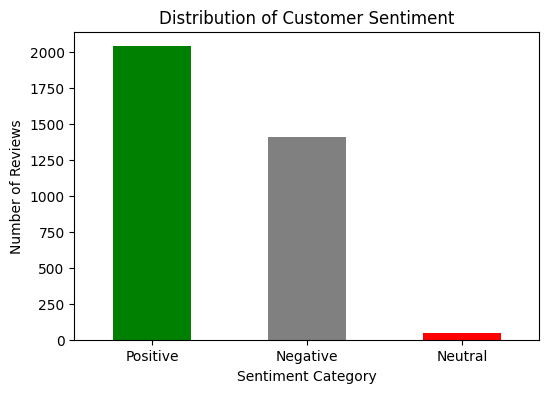

In [329]:
plt.figure(figsize=(6,4))
airline_scrapped_rev['sentiment_label'].value_counts().plot(
    kind='bar', color=['green', 'gray', 'red'], rot=0)
plt.title('Distribution of Customer Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

## *Save Datasets*

In [424]:
airline_scrapped_rev.to_csv('AirlineScrappedReview_Cleaned_CLEANED.csv', index=False)
customer_comment.to_csv('Customer_comment_CLEANED.csv', index=False)
passenger_booking.to_csv('Passanger_booking_CLEANED.csv', index=False)
survey_data.to_csv('Survey data_Inflight Satisfaction Score_CLEANED.csv', index=False)

## *Questions*

**1. What are the top 10 most popular flight routes? What is the distribution of bookings across flight hours?**

In [330]:
top_routes = passenger_booking['route'].value_counts().head(10)

In [331]:
def format_route(route):
    if isinstance(route, str) and len(route) == 6:  # 3 letters per airport code
        return f"{route[:3]} → {route[3:]}"
    else:
        return route

In [332]:
formatted_routes = [format_route(r) for r in top_routes.index]

In [333]:
print("Top 10 Most Popular Flight Routes:")
for i, (route, count) in enumerate(zip(formatted_routes, top_routes.values), start=1):
    print(f"{i}. {route}: {count} bookings")

Top 10 Most Popular Flight Routes:
1. AKL → KUL: 2620 bookings
2. PEN → TPE: 912 bookings
3. MEL → SGN: 833 bookings
4. ICN → SIN: 793 bookings
5. DMK → KIX: 729 bookings
6. ICN → SYD: 683 bookings
7. DMK → PER: 677 bookings
8. DPS → ICN: 658 bookings
9. DMK → OOL: 652 bookings
10. MEL → TPE: 637 bookings


### Top 10 Most Popular Flight Routes:
1. AKL → KUL: 2620 bookings
2. PEN → TPE: 912 bookings
3. MEL → SGN: 833 bookings
4. ICN → SIN: 793 bookings
5. DMK → KIX: 729 bookings
6. ICN → SYD: 683 bookings
7. DMK → PER: 677 bookings
8. DPS → ICN: 658 bookings
9. DMK → OOL: 652 bookings
10. MEL → TPE: 637 bookings

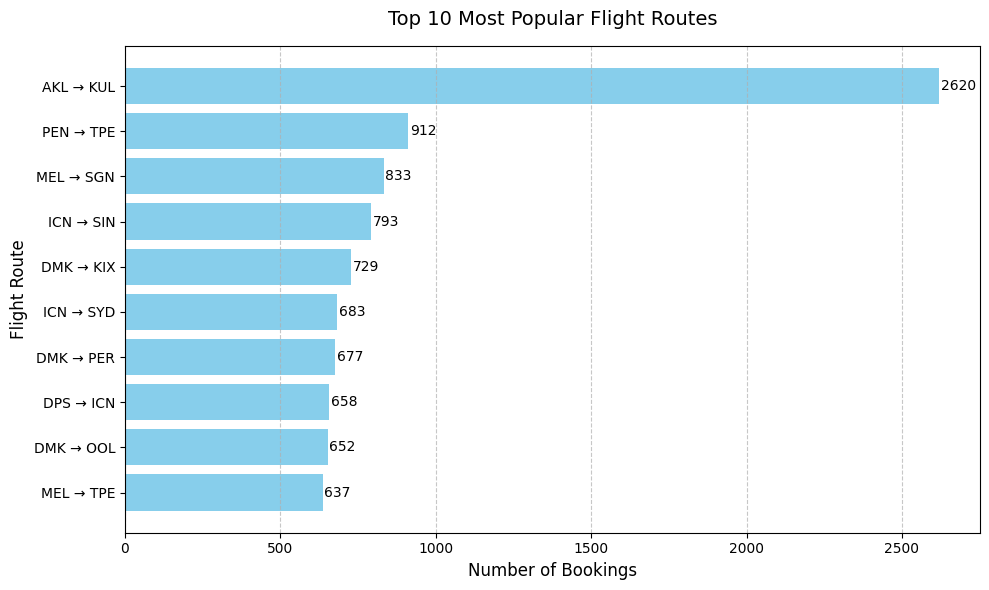

In [334]:
plt.figure(figsize=(10, 6))
bars = plt.barh(formatted_routes[::-1], top_routes.values[::-1], color='skyblue')

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", va='center', fontsize=10)

plt.title('Top 10 Most Popular Flight Routes', fontsize=14, pad=15)
plt.xlabel('Number of Bookings', fontsize=12)
plt.ylabel('Flight Route', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [335]:
passenger_booking['flight_hour'] = passenger_booking['flight_hour'].astype(int)
hourly_distribution = passenger_booking['flight_hour'].value_counts().sort_index()

In [ ]:
print("Distribution of Bookings across Flight Hours:\n", hourly_distribution)

Distribution of Bookings across Flight Hours:
 flight_hour
0     1501
1     2071
2     2596
3     2616
4     2786
5     2817
6     3011
7     3080
8     3125
9     3098
10    3050
11    3071
12    3114
13    3046
14    2783
15    2201
16    1536
17     848
18     430
19     294
20     275
21     386
22     573
23     975
Name: count, dtype: int64


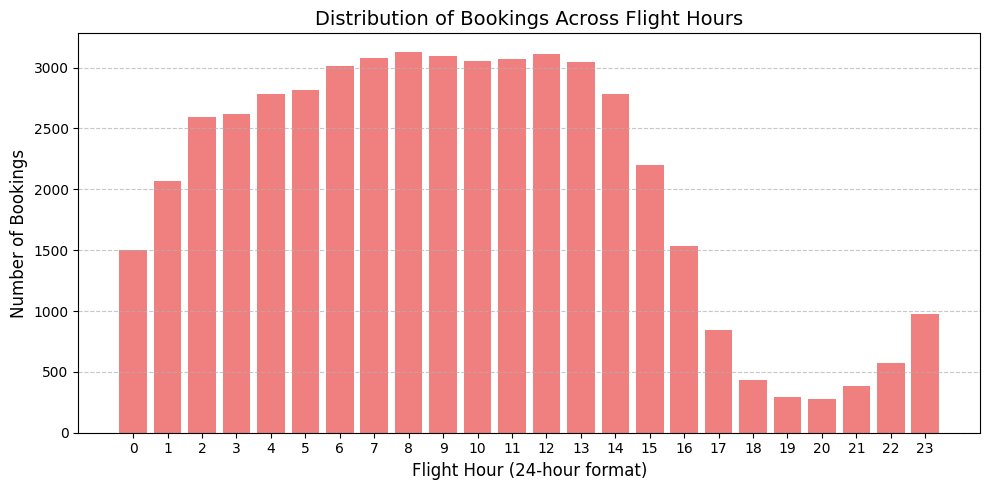

In [337]:
plt.figure(figsize=(10, 5))
plt.bar(hourly_distribution.index, hourly_distribution.values, color='lightcoral')
plt.title('Distribution of Bookings Across Flight Hours', fontsize=14)
plt.xlabel('Flight Hour (24-hour format)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**2. By analyzing review patterns, which traveler type and class combination yields the highest and lowest ratings?**

In [338]:
grouped_ratings = airline_scrapped_rev.groupby(['Traveller_Type', 'Class'])['Rating'].mean().reset_index()

In [339]:
grouped_ratings = grouped_ratings.sort_values(by='Rating', ascending=False)

print("Average Ratings by Traveller Type and Class:\n")
grouped_ratings

Average Ratings by Traveller Type and Class:



,Traveller_Type,Class,Rating
19,Unknown,First Class,7.166667
14,Solo Leisure,First Class,6.627907
6,Couple Leisure,First Class,5.983607
20,Unknown,Premium Economy,5.948052
17,Unknown,Business Class,5.908046
18,Unknown,Economy Class,5.800664
12,Solo Leisure,Business Class,5.780347
8,Family Leisure,Business Class,5.743902
15,Solo Leisure,Premium Economy,5.653061
4,Couple Leisure,Business Class,5.324324


In [340]:
highest_combo = grouped_ratings.iloc[0]
lowest_combo = grouped_ratings.iloc[-1]

print(f"Highest: {highest_combo['Traveller_Type']} ({highest_combo['Class']}) - Average Rating: {highest_combo['Rating']}")
print(f"Lowest: {lowest_combo['Traveller_Type']} ({lowest_combo['Class']}) - Average Rating: {lowest_combo['Rating']}")

Highest Rated Combination: Unknown (First Class) with average rating 7.166666666666667
Lowest Rated Combination: Various (Economy Class) with average rating 1.0


### Which traveler type and class combination yields the highest and lowest ratings?
* Highest: Unknown (First Class) - Average Rating: 7.166666666666667
* Lowest: Various (Economy Class) - Average Rating: 1.0

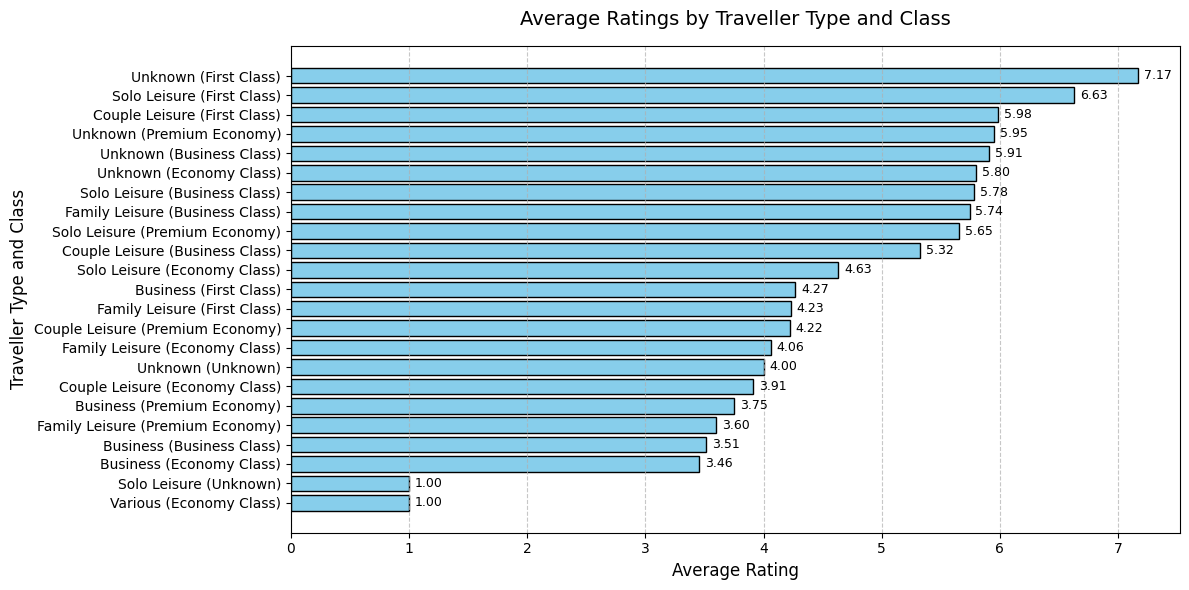

In [341]:
plt.figure(figsize=(12, 6))
y_labels = [f"{t} ({c})" for t, c in zip(grouped_ratings['Traveller_Type'], grouped_ratings['Class'])]
bars = plt.barh(y_labels[::-1], grouped_ratings['Rating'][::-1], color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center', fontsize=9)

plt.title('Average Ratings by Traveller Type and Class', fontsize=14, pad=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Traveller Type and Class', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# PREDICTIVE MODELLING

## *Selecting the features and target labels*

In [342]:
# Prepare the target label (1 = satisfied, 0 = dissatisfied)
airline_scrapped_rev['Satisfaction'] = (airline_scrapped_rev['Rating'] >= 5).astype(int)

In [343]:
features = ['Traveller_Type', 'Class', 'Verified', 'sentiment_score']
target = 'Satisfaction'
X = airline_scrapped_rev[features].copy()
y = airline_scrapped_rev[target]
airline_scrapped_rev.head(2)

,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,sentiment_score,sentiment_label,Satisfaction
0,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,None,-0.7990,Negative,0
1,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,None,0.7184,Positive,0


In [344]:
X_encoded = pd.get_dummies(X, columns=['Traveller_Type', 'Class', 'Verified'], drop_first=True)

X_encoded.head()

,sentiment_score,Traveller_Type_Couple Leisure,Traveller_Type_Family Leisure,Traveller_Type_Solo Leisure,Traveller_Type_Unknown,Traveller_Type_Various,Class_Economy Class,Class_First Class,Class_Premium Economy,Class_Unknown,Verified_Trip Verified
0,-0.7990,False,False,True,False,False,True,False,False,False,True
1,0.7184,True,False,False,False,False,False,False,False,False,True
2,-0.7096,False,False,True,False,False,False,False,False,False,True
3,-0.5849,False,False,True,False,False,True,False,False,False,False
4,0.9657,False,True,False,False,False,False,False,False,False,True


In [345]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***First Approach**: Logistic Regression*

In [346]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [347]:
y_pred = log_reg_model.predict(X_test)

In [348]:
# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")

Logistic Regression Evaluation Metrics:
Accuracy : 0.795
Precision: 0.750
Recall   : 0.853
F1-Score : 0.798


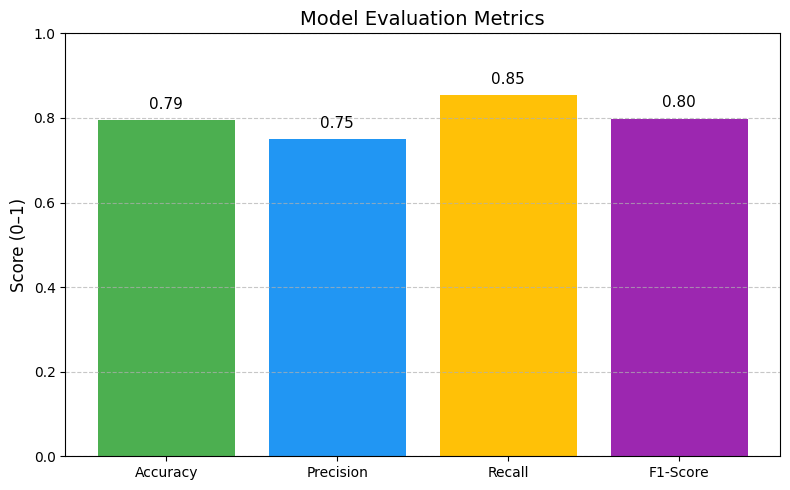

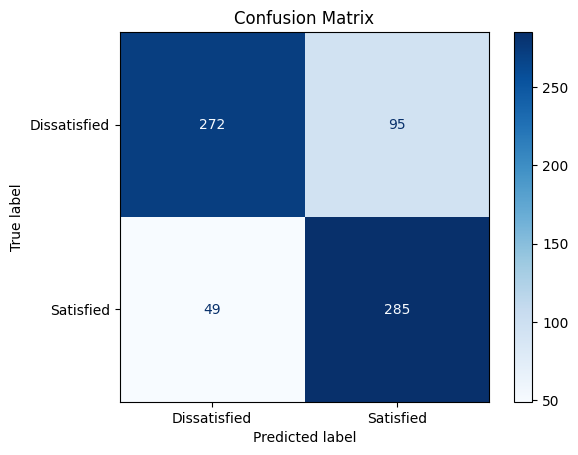

In [349]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color=['#4CAF50', '#2196F3', '#FFC107', '#9C27B0'])
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics', fontsize=14)
plt.ylabel('Score (0–1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dissatisfied', 'Satisfied'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## ****Second Approach***: FFNN*

In [361]:
ffnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
ffnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [362]:
ffnn_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [363]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = ffnn_model.fit(
    X_train_scaled, y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5856 - loss: 0.6588 - val_accuracy: 0.7554 - val_loss: 0.5844
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7743 - loss: 0.5472 - val_accuracy: 0.8250 - val_loss: 0.5207
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.5101 - val_accuracy: 0.8214 - val_loss: 0.4696
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4826 - val_accuracy: 0.8161 - val_loss: 0.4470
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.4571 - val_accuracy: 0.8179 - val_loss: 0.4444


In [364]:
y_pred_prob = ffnn_model.predict(X_test_scaled)
y_pred_ffnn = (y_pred_prob > 0.5).astype(int)

acc2 = accuracy_score(y_test, y_pred_ffnn)
prec2 = precision_score(y_test, y_pred_ffnn)
rec2 = recall_score(y_test, y_pred_ffnn)
f12 = f1_score(y_test, y_pred_ffnn)

print("FFNN Evaluation Metrics:")
print(f"Accuracy : {acc2:.3f}")
print(f"Precision: {prec2:.3f}")
print(f"Recall   : {rec2:.3f}")
print(f"F1-Score : {f12:.3f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
FFNN Evaluation Metrics:
Accuracy : 0.795
Precision: 0.758
Recall   : 0.835
F1-Score : 0.795


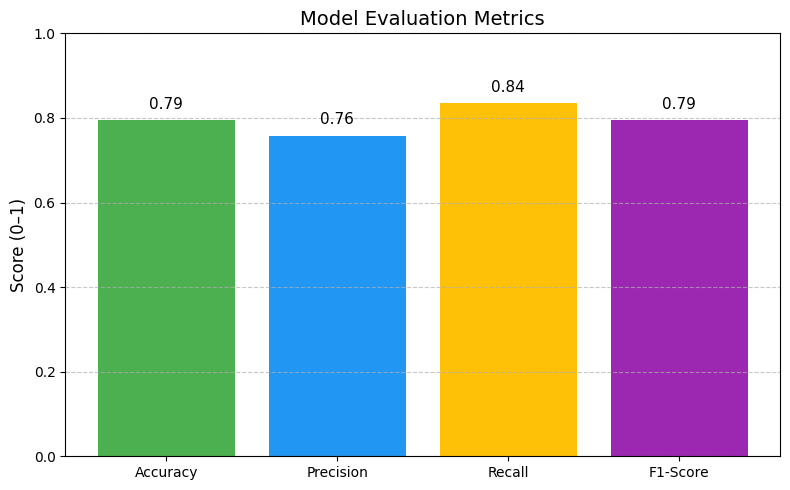

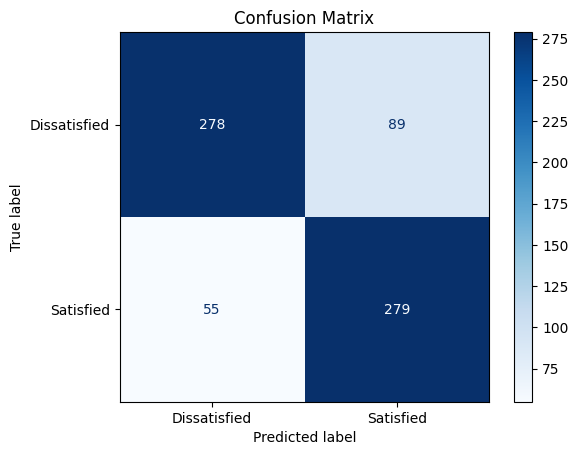

In [365]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acc2, prec2, rec2, f12]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color=['#4CAF50', '#2196F3', '#FFC107', '#9C27B0'])
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics', fontsize=14)
plt.ylabel('Score (0–1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred_ffnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dissatisfied', 'Satisfied'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## *Models Comparison*

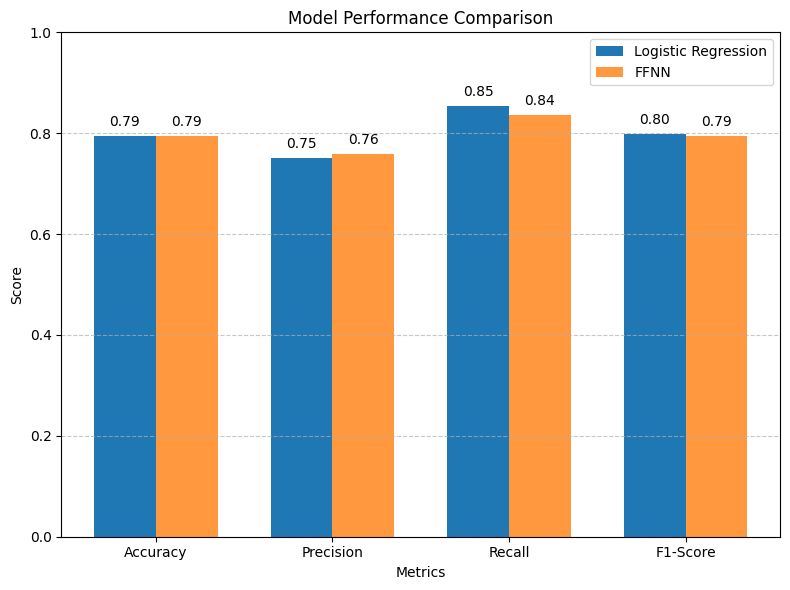

In [366]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

log_reg_scores = [acc, prec, rec, f1]
ffnn_scores = [acc2, prec2, rec2, f12]


x = np.arange(len(metrics))
width = 0.35


plt.figure(figsize=(8, 6))
plt.bar(x - width/2, log_reg_scores, width, label='Logistic Regression')
plt.bar(x + width/2, ffnn_scores, width, label='FFNN', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(metrics)):
    plt.text(x[i] - width/2, log_reg_scores[i] + 0.02, f"{log_reg_scores[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, ffnn_scores[i] + 0.02, f"{ffnn_scores[i]:.2f}", ha='center')

plt.tight_layout()
plt.show()


# MODELS EXPLAINABILITY

## *Preparing Data*

In [367]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Feature columns:", list(X_test_scaled.columns))

✅ Data prepared for SHAP and LIME
Feature columns: ['sentiment_score', 'Traveller_Type_Couple Leisure', 'Traveller_Type_Family Leisure', 'Traveller_Type_Solo Leisure', 'Traveller_Type_Unknown', 'Traveller_Type_Various', 'Class_Economy Class', 'Class_First Class', 'Class_Premium Economy', 'Class_Unknown', 'Verified_Trip Verified']


In [368]:
# Create a mapping from each feature to its group
feature_groups = {}
for col in X_train_scaled.columns:
    group = col.split('_')[0]
    feature_groups[col] = group

list(feature_groups.items())[:10]

[('sentiment_score', 'sentiment'),
 ('Traveller_Type_Couple Leisure', 'Traveller'),
 ('Traveller_Type_Family Leisure', 'Traveller'),
 ('Traveller_Type_Solo Leisure', 'Traveller'),
 ('Traveller_Type_Unknown', 'Traveller'),
 ('Traveller_Type_Various', 'Traveller'),
 ('Class_Economy Class', 'Class'),
 ('Class_First Class', 'Class'),
 ('Class_Premium Economy', 'Class'),
 ('Class_Unknown', 'Class')]

In [369]:
importance = pd.DataFrame({'Feature': X_encoded.columns,'Coefficient': log_reg_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
importance.head(10)

,Feature,Coefficient
0,sentiment_score,2.081960
4,Traveller_Type_Unknown,1.302639
3,Traveller_Type_Solo Leisure,0.811209
1,Traveller_Type_Couple Leisure,0.615886
2,Traveller_Type_Family Leisure,0.601761
7,Class_First Class,0.014337
5,Traveller_Type_Various,-0.026574
10,Verified_Trip Verified,-0.026706
8,Class_Premium Economy,-0.217142
9,Class_Unknown,-0.294441


In [370]:
importance['Feature_Group'] = importance['Feature'].str.split('_').str[0]

## *Logistic Regression Model*

In [371]:
agg_importance = importance.groupby('Feature_Group')['Coefficient'].apply(lambda x: x.abs().max()).sort_values(ascending=False)

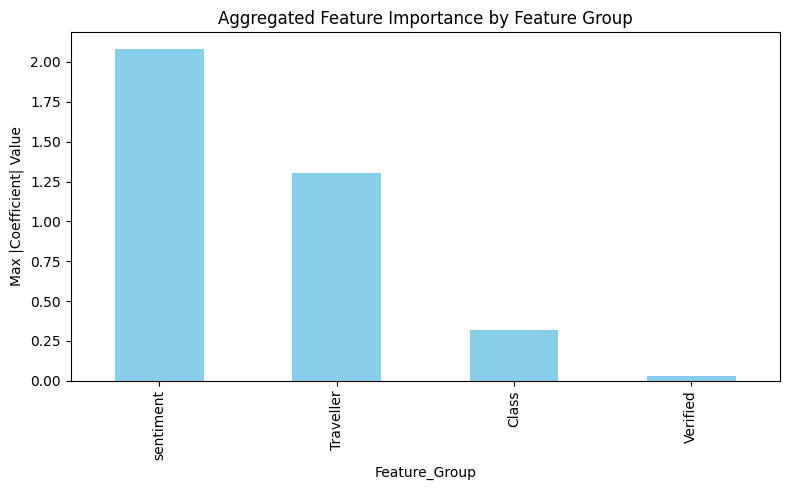

In [372]:
plt.figure(figsize=(8,5))
agg_importance.plot(kind='bar', color='skyblue')
plt.title('Aggregated Feature Importance by Feature Group')
plt.ylabel('Max |Coefficient| Value')
plt.tight_layout()
plt.show()

## *FFNN Model*

### *SHAP*

#### *Global Explanation*

In [373]:
ffnn_explainer = shap.Explainer(ffnn_model, shap.sample(X_train_scaled, 100, random_state=42))

In [374]:
shap_values_ffnn = ffnn_explainer(X_test_scaled)

PermutationExplainer explainer: 702it [02:22,  4.59it/s]                         


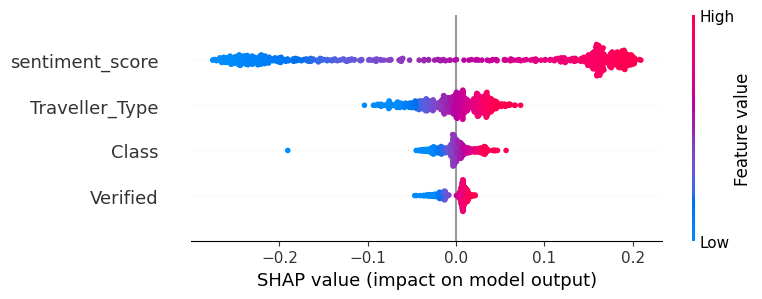

In [442]:
feature_groups = {
    'Traveller_Type': [c for c in X_encoded.columns if 'Traveller_Type' in c],
    'Class': [c for c in X_encoded.columns if 'Class' in c and 'Class_' in c],
    'Verified': [c for c in X_encoded.columns if 'Verified' in c],
    'sentiment_score': ['sentiment_score']
}

grouped_shap = {}

for group, cols in feature_groups.items():
    idxs = [list(X_encoded.columns).index(c) for c in cols]
    grouped_shap[group] = shap_values_ffnn.values[:, idxs].sum(axis=1)

grouped_shap_df = pd.DataFrame(grouped_shap)

shap.summary_plot(grouped_shap_df.values, features=grouped_shap_df.values, feature_names=grouped_shap_df.columns)

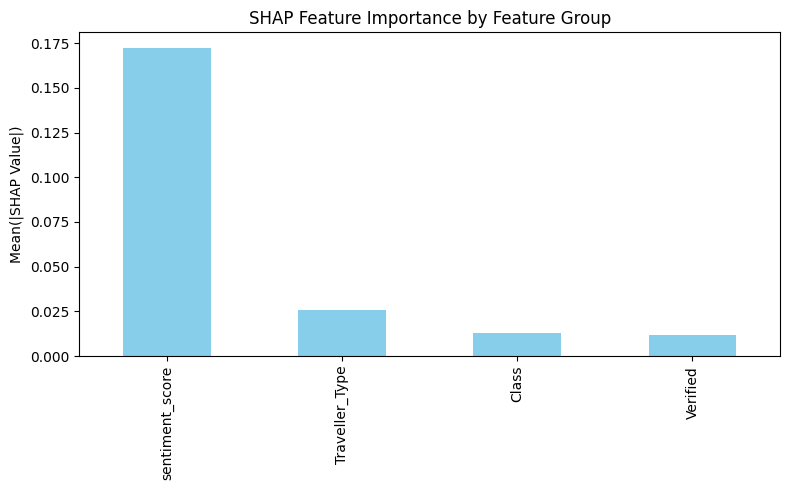

sentiment_score    0.172472
Traveller_Type     0.025699
Class              0.013018
Verified           0.011805
dtype: float64

In [443]:
group_importance = grouped_shap_df.abs().mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
group_importance.plot(kind='bar', color='skyblue')
plt.title("SHAP Feature Importance by Feature Group")
plt.ylabel("Mean(|SHAP Value|)")
plt.tight_layout()
plt.show()

group_importance

#### Local Explanation

In [420]:
sv_instance = pd.DataFrame(
    shap_values_ffnn[i].values.reshape(1, -1),
    columns=X_test_scaled.columns
)
fv_instance = pd.DataFrame(
    X_test_scaled.iloc[i].values.reshape(1, -1),
    columns=X_test_scaled.columns
)

sv_instance = sv_instance.fillna(0).astype(float)
fv_instance = fv_instance.fillna(0).astype(float)

sv_grouped = sv_instance.copy()
fv_grouped = fv_instance.copy()
sv_grouped.columns = sv_grouped.columns.str.split('_').str[0]
fv_grouped.columns = fv_grouped.columns.str.split('_').str[0]
sv_grouped = sv_grouped.groupby(level=0, axis=1).sum()
fv_grouped = fv_grouped.groupby(level=0, axis=1).sum()

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.


In [421]:
i = 1
sv_grouped_shap = shap.Explanation(
    values=sv_grouped.values,
    base_values=shap_values_ffnn.base_values[i],
    data=fv_grouped.values,
    feature_names=sv_grouped.columns.tolist()
)

In [422]:
shap.initjs()
shap.plots.force(sv_grouped_shap)

### *LIME*

In [398]:
def predict_fn_ffnn(X):
    probs = ffnn_model.predict(X)
    if probs.ndim == 1:
        probs = probs.reshape(-1, 1)
    return np.concatenate([1 - probs, probs], axis=1)

In [400]:
explainer_lime_ffnn = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled.values,
    feature_names=X_train_scaled.columns,
    class_names=['Dissatisfied', 'Satisfied'],
    discretize_continuous=True
)

In [401]:
i = 1
exp_ffnn = explainer_lime_ffnn.explain_instance(
    X_test_scaled.values[i],
    predict_fn_ffnn,
    num_features=20
)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [402]:
import re

def base_feature_name(lime_feature_str: str) -> str:
    tokens = re.findall(r'[A-Za-z_][A-Za-z0-9_ ]+', lime_feature_str)
    if tokens:
        return max(tokens, key=len).strip()
    return lime_feature_str.strip()

def feature_group(col: str) -> str:
    col = col.strip()
    if col.startswith('Traveller_Type'):
        return 'Traveller_Type'
    elif col.startswith('Class'):
        return 'Class'
    elif col.startswith('Verified'):
        return 'Verified'
    elif col.startswith('sentiment'):
        return 'sentiment'
    else:
        return col.split('_')[0]

In [403]:
available_labels = list(exp_ffnn.as_map().keys())
label_to_explain = available_labels[0]  # use whichever label exists (usually 1)

pairs = exp_ffnn.as_list(label=label_to_explain)
lime_df = pd.DataFrame(pairs, columns=['FeatureCond', 'Weight'])
lime_df['BaseFeature'] = lime_df['FeatureCond'].apply(base_feature_name)
lime_df['Feature_Group'] = lime_df['BaseFeature'].apply(feature_group)

lime_group_signed = lime_df.groupby('Feature_Group')['Weight'].sum()

order = lime_df.groupby('Feature_Group')['Weight'].apply(lambda s: s.abs().sum()).sort_values(ascending=True).index
lime_group_signed = lime_group_signed.loc[order]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


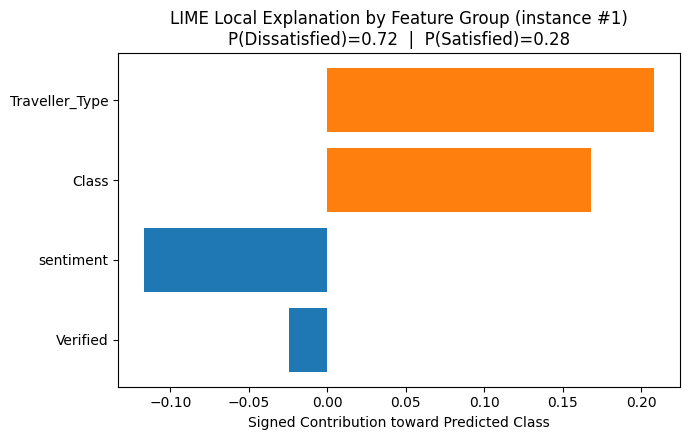

,Signed_Weight
Feature_Group,
Verified,-0.024760
sentiment,-0.116887
Class,0.167958
Traveller_Type,0.208309


In [404]:
probs = predict_fn_ffnn(X_test_scaled.values[[i]])[0]
plt.figure(figsize=(7, 4.5))
colors = ['tab:orange' if w > 0 else 'tab:blue' for w in lime_group_signed.values]
plt.barh(lime_group_signed.index, lime_group_signed.values, color=colors)
plt.title(f"LIME Local Explanation by Feature Group (instance #{i})\n"
          f"P(Dissatisfied)={probs[0]:.2f}  |  P(Satisfied)={probs[1]:.2f}")
plt.xlabel("Signed Contribution toward Predicted Class")
plt.tight_layout()
plt.show()

display(lime_group_signed.rename("Signed_Weight").to_frame())

# INFERENCE FUNCTION

In [405]:
label_mapping = {
    0: "Dissatisfied",
    1: "Satisfied"
}

In [408]:
def predict_log_reg(raw_input, reference_columns):
    df = pd.DataFrame([raw_input])
    df['sentiment_score'] = df['Review_content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    df.drop(columns=['Review_content'], inplace=True)
    df_encoded = pd.get_dummies(df, 
                                columns=['Traveller_Type', 'Class', 'Verified'], 
                                drop_first=True)
    df_encoded = df_encoded.reindex(columns=reference_columns, fill_value=0)

    pred_class = log_reg_model.predict(df_encoded)[0]
    return label_mapping[pred_class]

In [409]:
def predict_ffnn(raw_input, reference_columns):
    df = pd.DataFrame([raw_input])
    df['sentiment_score'] = df['Review_content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    df.drop(columns=['Review_content'], inplace=True)
    df_encoded = pd.get_dummies(df, 
                                columns=['Traveller_Type', 'Class', 'Verified'], 
                                drop_first=True)
    df_encoded = df_encoded.reindex(columns=reference_columns, fill_value=0)
    df_scaled = scaler.transform(df_encoded)
    prob = ffnn_model.predict(df_scaled)[0][0]
    pred_class = int(prob >= 0.5)
    return f"{label_mapping[pred_class]}"

In [412]:
example1 = {
    "Review_content": "Amazing flight, super comfortable and great food!",
    "Traveller_Type": "Business",
    "Class": "Economy",
    "Verified": "Yes"
}

print("LogReg:", predict_log_reg(example1, X_encoded.columns))
print("FFNN :", predict_ffnn(example1, X_encoded.columns))

LogReg: Satisfied
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
FFNN : Satisfied


In [414]:
example2 = {
    "Review_content": "Terrible experience, rude crew, uncomfortable seats.",
    "Traveller_Type": "Leisure",
    "Class": "Economy",
    "Verified": "No"
}

print("LogReg:", predict_log_reg(example2, X_encoded.columns))
print("FFNN :", predict_ffnn(example2, X_encoded.columns))

LogReg: Dissatisfied
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
FFNN : Dissatisfied
